In [67]:
import json 

file_path = "validation_accuracies.json"

with open(file_path, "r") as file:
    data = json.load(file)

In [68]:
data

{'checkpoints': {'mic': '/home/tlips/Documents/ast/egs/robomic/exp/test-robomic-mic-20250325_095144',
  'laser': '/home/tlips/Documents/ast/egs/robomic/exp/test-robomic-laser-20250325_100351'},
 'accuracies': {'disturbance_noise_armstrong': {'mic_fold_0': 0.9310344827586207,
   'mic_fold_1': 0.896551724137931,
   'mic_fold_2': 0.9310344827586207,
   'mic_fold_3': 0.8620689655172413,
   'mic_fold_4': 0.9310344827586207,
   'laser_fold_0': 0.9310344827586207,
   'laser_fold_1': 0.9310344827586207,
   'laser_fold_2': 0.9655172413793104,
   'laser_fold_3': 0.896551724137931,
   'laser_fold_4': 0.896551724137931,
   'mic': 0.9103448275862069,
   'mic_lower_bound': 0.4727356030549014,
   'mic_upper_bound': 0.9913787879161483,
   'laser': 0.9241379310344827,
   'laser_lower_bound': 0.48604733269146466,
   'laser_upper_bound': 0.9936675420097041},
  'disturbance_noise_red_hot_chillipeppers': {'mic_fold_0': 0.9,
   'mic_fold_1': 0.9666666666666667,
   'mic_fold_2': 0.8333333333333334,
   'mic_f

In [69]:
# create df for each experiment, colums: sensor, fold_id, accuracy
import pandas as pd
accuracies =data["accuracies"]

confusion_matrix_dict =  {}
for key in accuracies:
    confusion_matrix_dict[key] = {}
    confusion_matrix_dict[key]["mic"] = {}
    confusion_matrix_dict[key]["laser"] = {}
    for elem in accuracies[key]:
        if "fold" in elem:
            sensor,_,fold_id = elem.split("_")

            confusion_matrix_dict[key][sensor][fold_id] = accuracies[key][elem]
        
# create df for each experiment, colums: sensor, fold_id, accuracy
df_list = []
for key in confusion_matrix_dict:
    for sensor in confusion_matrix_dict[key]:
        for fold_id in confusion_matrix_dict[key][sensor]:
            df_list.append({"experiment": key, "sensor": sensor, "fold_id": fold_id, "accuracy": confusion_matrix_dict[key][sensor][fold_id]})
df = pd.DataFrame(df_list)

df

# create new df that lists all expeirments that have 'noise' in the name
df_noise = df[df["experiment"].str.contains("noise")]

# create new df that lists all expeirments that have not 'noise' in the name
df_no_noise = df[~df["experiment"].str.contains("noise")]
#drop the experiment called 'robot tapping' because we do not want to include it in this analysis
df_no_noise =df_no_noise[~df_no_noise["experiment"].str.contains("tapping")]
print(f"{len(df_noise)} experiments with noise")
print(f"{len(df_no_noise)} experiments with no noise")



40 experiments with noise
40 experiments with no noise


In [70]:
# create avg and std dev for each sensor in df_noise and df_no_noise
df_noise_avg = df_noise.groupby(["sensor"]).agg({"accuracy": ["mean", "std"]}).reset_index()
df_noise_avg.columns = ["sensor", "mean", "std"]
# round(2)
df_noise_avg["mean"] = df_noise_avg["mean"].round(2)
df_noise_avg["std"] = df_noise_avg["std"].round(2)

df_no_noise_avg = df_no_noise.groupby(["sensor"]).agg({"accuracy": ["mean", "std"]}).reset_index()
df_no_noise_avg.columns = ["sensor", "mean", "std"]
# round(2)
df_no_noise_avg["mean"] = df_no_noise_avg["mean"].round(2)
df_no_noise_avg["std"] = df_no_noise_avg["std"].round(2)

print(df_noise_avg)

print(df_no_noise_avg)

  sensor  mean   std
0  laser  0.95  0.03
1    mic  0.91  0.10
  sensor  mean   std
0  laser  0.92  0.15
1    mic  0.34  0.42


In [71]:
# create df that for each expimerent and sensor, the mean and std of the accuracies
df_mean = df.groupby(["experiment", "sensor"]).agg({"accuracy": ["mean", "std"]}).reset_index()
df_mean.columns = ["experiment", "sensor", "mean_accuracy", "std_accuracy"]

# round to two decimal places
df_mean["mean_accuracy"] = df_mean["mean_accuracy"].round(2)
df_mean["std_accuracy"] = df_mean["std_accuracy"].round(2)
df_mean


,experiment,sensor,mean_accuracy,std_accuracy
0,disturbance_cup_mimicking_m6x14,laser,0.90,0.17
1,disturbance_cup_mimicking_m6x14,mic,0.00,0.00
2,disturbance_cup_mimicking_playdough,laser,0.86,0.22
3,disturbance_cup_mimicking_playdough,mic,1.00,0.00
4,disturbance_cup_shaking_m6x14,laser,0.94,0.13
5,disturbance_cup_shaking_m6x14,mic,0.00,0.00
6,disturbance_cup_shaking_playdough,laser,1.00,0.00
7,disturbance_cup_shaking_playdough,mic,0.38,0.08
8,disturbance_noise_armstrong,laser,0.92,0.03
9,disturbance_noise_armstrong,mic,0.91,0.03


# Confusion matrices

In [72]:
import numpy as np 
import seaborn as sns

In [73]:
confusion_matrices_json = "validation_confusion_matrices.json"
with open(confusion_matrices_json, "r") as file:
    confusion_matrices = json.load(file)
    


In [74]:
# create df for each experiment, colums: sensor, fold_id, accuracy
import pandas as pd
accuracies =confusion_matrices["confusion_matrices"]

confusion_matrix_dict =  {}
for key in accuracies:
    confusion_matrix_dict[key] = {}
    for elem in accuracies[key]:
        if elem == "laser": 
            confusion_matrix_dict[key]["laser"] = accuracies[key][elem]
        elif elem == "mic":
            confusion_matrix_dict[key]["mic"] = accuracies[key][elem]
        
confusion_matrix_dict


{'disturbance_noise_armstrong': {'mic': [[50, 0, 0], [0, 45, 0], [13, 0, 37]],
  'laser': [[50, 0, 0], [5, 40, 0], [6, 0, 44]]},
 'disturbance_noise_red_hot_chillipeppers': {'mic': [[49, 1, 0],
   [0, 50, 0],
   [11, 7, 32]],
  'laser': [[50, 0, 0], [5, 45, 0], [2, 0, 48]]},
 'disturbance_noise_skrillex': {'mic': [[50, 0, 0], [1, 49, 0], [18, 1, 31]],
  'laser': [[50, 0, 0], [6, 44, 0], [0, 0, 50]]},
 'disturbance_noise_white_noise': {'mic': [[50, 0, 0], [0, 50, 0], [0, 0, 50]],
  'laser': [[50, 0, 0], [4, 46, 0], [0, 0, 50]]},
 'disturbance_cup_mimicking_m6x14': {'mic': [[0, 0, 0],
   [0, 0, 0],
   [14, 36, 0]],
  'laser': [[0, 0, 0], [0, 0, 0], [5, 0, 45]]},
 'disturbance_cup_shaking_m6x14': {'mic': [[0, 0, 0], [0, 0, 0], [0, 50, 0]],
  'laser': [[0, 0, 0], [0, 0, 0], [3, 0, 47]]},
 'disturbance_cup_mimicking_playdough': {'mic': [[0, 0, 0],
   [0, 0, 0],
   [0, 0, 50]],
  'laser': [[0, 0, 0], [0, 0, 0], [7, 0, 43]]},
 'disturbance_cup_shaking_playdough': {'mic': [[0, 0, 0],
   [0, 0,

In [75]:
#get all matrices for laser and noise

laser_sound_list = []
mic_sound_list = []
laser_targetted_list = []
mic_targetted_list = []
for key in confusion_matrix_dict:
    if "noise" in key:
        laser_sound_list.append(confusion_matrix_dict[key]["laser"])
        mic_sound_list.append(confusion_matrix_dict[key]["mic"])
    if "shak" in key or "mimick" in key:
        laser_targetted_list.append(confusion_matrix_dict[key]["laser"])
        mic_targetted_list.append(confusion_matrix_dict[key]["mic"])


In [76]:
laser_sound_confusion = np.sum(laser_sound_list, axis=0)
mic_sound_confusion = np.sum(mic_sound_list, axis=0)
laser_targetted_confusion = np.sum(laser_targetted_list, axis=0)
mic_targetted_confusion = np.sum(mic_targetted_list, axis=0)



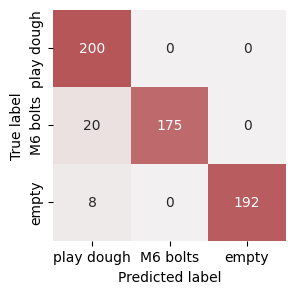

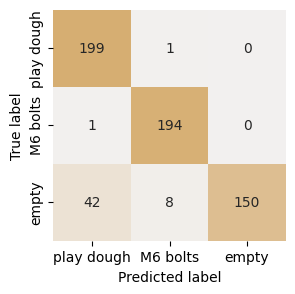

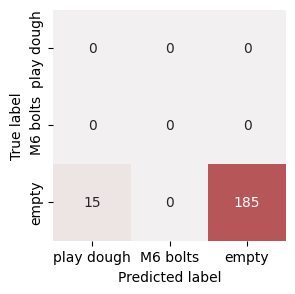

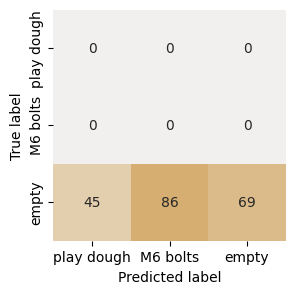

In [78]:
# create sns confusion matrix 

classes=  ["play dough", "M6 bolts", "empty"]
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(3, 3))

    # colormap  hsv: 358°	53°	72° 
    # linearly interpolate 10 colors between these two colors


    laser = (183/255,86/255,89/255)
    mic = (214/255,174/255,114/255)
    if "mic" in title.lower():
        cmap = sns.light_palette(mic, as_cmap=True)
    elif "laser" in title.lower():
        cmap = sns.light_palette(laser, as_cmap=True)
    else:
        print("woops")



    sns.heatmap(cm, annot=True, fmt='g', xticklabels=classes, yticklabels=classes, cbar=False, cmap=cmap)
    #plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.savefig(f"{title}.png", dpi=300, bbox_inches='tight')
    plt.show()
plot_confusion_matrix(laser_sound_confusion, classes, "Laser Sound Confusion Matrix")
plot_confusion_matrix(mic_sound_confusion, classes, "Mic Sound Confusion Matrix")
plot_confusion_matrix(laser_targetted_confusion, classes, "Laser Targetted Confusion Matrix")
plot_confusion_matrix(mic_targetted_confusion, classes, "Mic Targetted Confusion Matrix")